In [158]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [115]:


url = 'https://www.ebid.net/us/buy/jewelry-watches/antique-vintage/'

In [116]:
source = requests.get(url)

In [117]:
source

<Response [200]>

In [118]:
soup = BeautifulSoup(source.text, 'html.parser')

In [119]:
#soup

In [120]:
main_content = soup.find('ul', attrs = {'id':'showroomhead'})

In [121]:
#main_content

In [122]:
items = main_content.find('div', attrs = {'class': 'clearfix entry-title'})

In [124]:
#items

In [125]:
product_list = []
for i in range(1,500):
    source = requests.get('https://www.ebid.net/us/buy/jewelry-watches/antique-vintage/page={i}.htm')
    for i in main_content.find_all('li', attrs = {'class': 'showroomcell'}):
        try:
            product = i.find('div', attrs = {'class': 'clearfix entry-title'}).text.strip()
        except:
            product = 'null'
        try:
            info = i.find('div', attrs={'class': 'dkgrey'}).text.strip()
        except:
            info = 'null'
        products = {
            'product': product,
            'info': info
            
        }
        
        product_list.append(products)

In [111]:
#items

In [126]:
eBid_jewelry = pd.DataFrame(product_list)
df = eBid_jewelry.copy()

In [149]:
df.to_csv('eBid_jewelry')

In [150]:
df2 = pd.read_csv('Ebid_jewelry')

In [151]:
df2.columns

Index(['Unnamed: 0', 'product', 'info'], dtype='object')

In [152]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [153]:
df2['info'] = df2['info'].str.strip('$')

In [156]:
df2['info'] = df2['info'].astype(float)

In [157]:
df2['info'].dtype

dtype('float64')

<AxesSubplot:xlabel='info'>

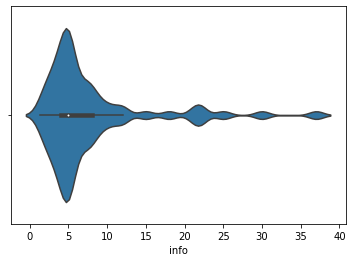

In [164]:
sns.violinplot(df2['info'])

In [165]:
outliers = df2[df2['info'] > 10]

<AxesSubplot:xlabel='info'>

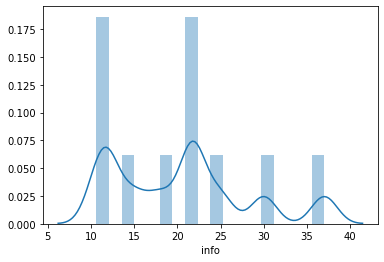

In [166]:
sns.distplot(outliers['info'])

In [172]:
outliers['product'].unique()

array(['Vintage Navajo Pebbled Turquoise Stone Screw Back Earrings 1940s-1950s',
       'Vintage Clip on Earrings Enamel Silver Thailand Dancers 1940s',
       'Vintage Clip on Earrings Piano Harpsicord Metal Silver? 1940s',
       'Sterling Silver Salt Spoon Pin Brooch Westmoreland George & Martha Vintage',
       'Vintage Bracelet Clear Rhinestone Band Prong Setting 1930/40s Excellent',
       'Vintage Florenza Bracelet Victorian Revival 1940s',
       'Gold Plated Enamelled Butterfly Jewellery Brooch',
       'Vintage Silver Plated Scottie Dog Charm Chain Bracelet',
       'Vintage Flower Shaped Aura Borealis Diamante Brooch Stamped Reg. Des.',
       'brooch pin Siam Sterling Fire Breathing Dragon Castle Ship pin back',
       'Trifari Silver Tone Necklace Bracelet Earring Set'], dtype=object)

In [171]:
datatoexcel = pd.ExcelWriter('eBid_jewelry.xlsx', engine='xlsxwriter')
df2.to_excel(datatoexcel, sheet_name='sheet1')
datatoexcel.save()